## Probabilistic (Bayesian) network

#### Introduction


**1**. In the Bayesian, or probabilistic, view of deep learning, the weights and biases at each node are not just real numbers, but they are drawn from learnable probability distributions. Given the training data and an assumption about the functional form of the prior and posterior distributions, the deep network evaluates Bayes rule at each node to compute the posterior probability density function. 

**2**. We implement the Bayesian network employing the framework of **Variational Bayes**. We first define the **prior and posterior functions** assuming they are of Gaussian functional form. The prior is a multi-variate, diagonal Gaussian, with zero covariance. The posterior is also a multi-variate Gaussian, but we allow for a trainable covariance. The initial covariance of the posterior is zero, but as the model gets trained it learns the covariance values from the correlation between the weights and biases.

**3**. We allow only for **epistemic uncertainty**, that is, statistical uncertainty related to our data set. The conceptually different type of uncertainty, namely the aleatoric (statistical/systematic) uncertainty, relates to inherently random effects. This uncertainty could be in principle implemented easily, but here we are intrested in the systematic effects in the analysis of our data.

#### Setting up and training the probabilistic neural network with DenseVariational layers

Here we define the network architecture and then we fit it. The network is based on Variational Layers, which allow for a learnable probability distribution function at each node, using the machinery of Variational Bayes. We use a ReLu activation function and a mean-square error cost function. **Input**: a list of $14$ numbers corresponding to $7+7$ values of total masses and total radii for the neutron star (i.e the actual mass and radius of the star). **Output**: a list of $7+7$ values of masses and sound speed value, with the mass here being a parametrisation of the interior density or radius of the star. 


#### Datasets
We have experimented with three datasets. **Dataset 1**: Each input to the network is 15 pairs of mass-radius values. **Dataset 2**: Each input is 15 triplets of mass-radius-tidal deformability. **Dataset 3**: Like dataset 2, but with 30 triplets for each input, instead of 15. We have found that our results are consistent with each other qualitatevely, though the resulting accuracy of the deep network is improved for dataset 3 since it adds one extra observable (tidal deformability) and more input points. 

- column 0, the low-density EOS, it can either be AP4 or SLy.
- column 1, the value of cosmological constant (from -(194 MeV)^4 to (194 MeV)^4).
- column 2-8, the 7 random values of mass density for the QCD speed of sound parametrization.
- column 9-15, the 7 random values of speed of sound for the QCD speed of sound parametrization.
- column 16-30, the 15 values of the masses on the M-R curve.
- column 31-45, the 15 values of the radii on the M-R curve.
- column 46-60, the 15 values of the tidal Love number on the M-k2 curve.

In [2]:
import matplotlib.pyplot as plt
import tf_keras
from tensorflow.keras import callbacks, optimizers
from tensorflow.keras import backend as K
from model import *
from sklearn import preprocessing

from tensorflow import keras

# Choose data set to load
dataset = 'dataset_3'

if dataset == 'dataset_1':
    df = read_csv("dataset1.csv", header = None)
    df = df.sample(frac=1).reset_index(drop=True)
    X, y = df.values[:,16:46], df.values[:,0:16]
# 
if dataset == 'dataset_2':
    df = read_csv("datasetk2_15points.csv", header = None)
    df = df.sample(frac=1).reset_index(drop=True)
    X, y = df.values[:,16:61], df.values[:,0:16]
# 
if dataset == 'dataset_3':
    df = read_csv("datasetk2_30points.csv", header = None)
    df = df.sample(frac=1).reset_index(drop=True)
    X, y = df.values[:,16:106], df.values[:,0:16]

#Encode strings to integer for the labels of the Equation of State: (ap4,sly)->(0,1)
y[:,0] =  LabelEncoder().fit_transform(y[:,0])
#Normalize the cosmological constant value and mass density to range (0,1)
y[:,1] = (y[:,1] + 194.)/388.
y[:,2] = y[:,2]/y[0,8] 
y[:,3] = y[:,3]/y[0,8] 
y[:,4] = y[:,4]/y[0,8]
y[:,5] = y[:,5]/y[0,8]
y[:,6] = y[:,6]/y[0,8]
y[:,7] = y[:,7]/y[0,8]
y[:,8] = y[:,8]/y[0,8] 

y = y[:,1:16] # Select only cosmological constant value + c_s-related columns

# Ensure all data are floating point values
X = X.astype('float32')
y = y.astype('float32')
print(X.shape, y.shape)

# Split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Lambda_values_test = y_test[:,0]

(149100, 90) (149100, 15)
(99897, 90) (49203, 90) (99897, 15) (49203, 15)


#### Construct and train the deep network (see "model.py" for definitions of some functions used.)

2024-05-09 21:13:43.276555: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 79086 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:0b:00.0, compute capability: 8.0


Epoch 1/50
   1/3122 [..............................] - ETA: 10:41:47 - loss: 380.9552 - accuracy: 0.0000e+00

I0000 00:00:1715282037.219665  170698 service.cc:145] XLA service 0x7f6f9e19b750 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1715282037.219700  170698 service.cc:153]   StreamExecutor device (0): NVIDIA A100-SXM4-80GB, Compute Capability 8.0
2024-05-09 21:13:57.232073: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-09 21:13:57.251564: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
I0000 00:00:1715282037.294675  170698 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3122/3122 [==============================] - 21s 3ms/step - loss: 1826.9829 - accuracy: 0.0669
Epoch 2/50
3122/3122 [==============================] - 9s 3ms/step - loss: 851.5711 - accuracy: 0.0664
Epoch 3/50
3122/3122 [==============================] - 9s 3ms/step - loss: 537.5914 - accuracy: 0.0716
Epoch 4/50
3122/3122 [==============================] - 9s 3ms/step - loss: 360.0164 - accuracy: 0.0625
Epoch 5/50
3122/3122 [==============================] - 9s 3ms/step - loss: 248.6077 - accuracy: 0.0596
Epoch 6/50
3122/3122 [==============================] - 9s 3ms/step - loss: 173.4393 - accuracy: 0.0663
Epoch 7/50
3122/3122 [==============================] - 9s 3ms/step - loss: 119.5855 - accuracy: 0.0684
Epoch 8/50
3122/3122 [==============================] - 9s 3ms/step - loss: 84.0714 - accuracy: 0.0703
Epoch 9/50
3122/3122 [==============================] - 9s 3ms/step - loss: 62.9679 - accuracy: 0.0682
Epoch 10/50
3122/3122 [==============================] - 9s 3ms/step - loss

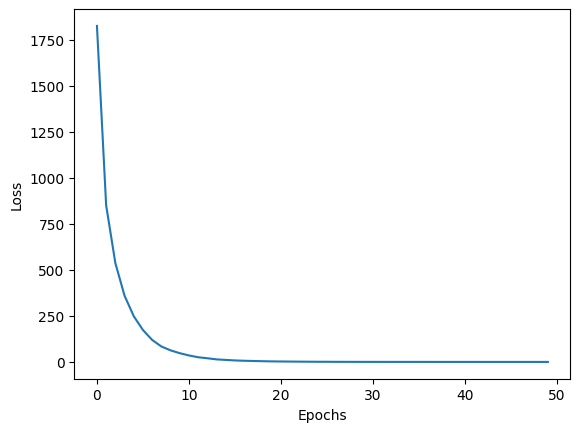

In [3]:
######## Hyperparameter choice for our network 
activation = 'LeakyReLU' ## choices: 'LeakyReLU', 'relu',  'sigmoid'
units = 16
epochs = 50
train_data = [X_train, y_train]
test_data = [X_test, y_test]
#########

# Build the model
model = produce_model(train_data, units, activation, get_prior, get_posterior, activation_last_layer=False)

# Compile the model 
model.compile(optimizer=tf_keras.optimizers.RMSprop(learning_rate=0.0001), loss='mse', metrics=['accuracy']) 

# Define a custom callback
callback = training_stop(terminate_at_accuracy = 0.7)

# Fit the model 
history = model.fit(X_train,y_train, epochs=epochs, verbose=1, callbacks = [callback])

# Plot the results 
plt.plot(history.history['loss']) 
plt.xlabel('Epochs')
plt.ylabel('Loss');


### Statistical pipeline for performance testing of the probabilistic network

Since our probabilistic network outputs realisations (samples) of the features, computing the accuracy of our network requires a statistical approach. Here I define such a pipeline. For more details please see the published paper. ***Some of the functions we use are defined in the file "model.py"***.

 **1.** Produce a sample of different realisations of (mass vs c_s) for a given input. The input is a given set of mass-radius values or a set of mass-radius-tidal numbers of the neutron star, plus the value of the vacuum energy at the core. They are composed of 7+7+1 = 15 data points tabulated in an array. 

 **2.** Use the trained Bayesian deep network to make predictions. In particular, execute the network multiple times, to create different statistical realisations of the output at fixed input. For this sample, find the mean (μ) and std. (σ) for the predictions for both (mass and c_s), where c_s is the speed of sound.

**3.** Compare the result with the "real" values of mass and c_s, i.e compared to the actual labels at training. Accept predicted points for which the "real" value is within the predicted mean $\pm \alpha*\sigma$,
\begin{equation}
 μ - α*σ < \text{``real" value} <  μ + α*σ.
\end{equation}
This provides an evaluation metric of the probabilistic network. The "real" values are the $14$ values of masses and sound speed (c_s) provided to the network as labels at training. For example, if we have $N$ values of the predicted mass satisfying the above condition, then the acceptance rate is $=N/7$, since we have $7$ values of outputed values for the mass (and c_s too).  




#### Evalute on specific inputs of our testing set to get an idea of performance.

We choose an N-number of random inputs from our testing data set and evaluate the performance of our network. We keep the desired statistical accuracy at 2σ. We first do it for the speed of sound (equation of state) prediction/feature.

In [19]:
# Picks up random points from the testing set. 
input_list = np.random.randint(1, high=int(len(test_data[0])-1), size = 10) 
eval_list = produce_evaluation(test_data, input_list, model, n_samples = 200, α = 2.0, check_range = False)
print(eval_list)

[[5, 150], [5, 150], [7, 150], [4, 150], [6, 150], [6, 150], [4, 150], [7, 150], [5, 150], [5, 150]]


We compute the statistics for the results of the above evaluation the mean and std. of the success ratio, which is the mean and std. of the accuracy for each input point. 

In [20]:
eval_list = np.array(eval_list)
print('Mean accuracy = ',np.mean(eval_list[:,0]/7)) #Divide by the number of pairs of points in each output (= 7)
print('Std. = ', np.std(eval_list[:,0]/7))
#plt.hist(blah[:,0],bins = 5)

Mean accuracy =  0.7714285714285715
Std. =  0.14568627181693672


We perform a similar, accuracy-evaluation analysis for the cosmological constant prediction/feature of the network. In this case, for each input in the network we get an 1-D array of values from which we compute the mean and std. and compare with the 'real' value.

In [7]:
input_list = np.random.randint(1, high=int(len(test_data[0])-1), size = 20) 
# print(input_list) # just in case one wants to see which inputs are considered

eval_result = produce_evaluation_Lambda(test_data, input_list, model, n_samples = 50, α = 2.5)
print('Mean accuracy = ', eval_result)

# Just in case one wants to evaluate individual inputs and print out the result.
#print("real = ",y_test[i00][0])
#print("mean + 2sigma = ",np.mean(sample2) + 2*np.std(sample2))
#print("mean - 2sigma = ",np.mean(sample2) - 2*np.std(sample2))


Mean accuracy =  0.7


#### Convergence check 
Here we check the convergence of the evaluation result with increasing number of samples at fixed input to the network. We perfrom this excercise here for a single input data point and using the sound speed prediction/feature as output.

In [ ]:
evaluation_variable_sample_number = [] # to append the evaluation results 

for i in [10,50,100,150,200,250,350,450]: # iterate over number of samples (at fixed EOS input = 1)
    eval_i = produce_evaluation(test_data, [100], model, n_samples = i, α = 2.0)
    evaluation_variable_sample_number.append([i,eval_i[0][0]])

# Plot the results 
evaluation_variable_sample_number = np.array(evaluation_variable_sample_number)
plt.scatter(evaluation_variable_sample_number[:,0],evaluation_variable_sample_number[:,1],
           marker = "o", color = 'green')
plt.xlabel("Number of samples (fixed input)")
plt.ylabel("Sound speed points within 2σ (out of 7)")
plt.show()


#### Plots (see "model.py" for definitions of some functions used.)

Here we plot: 

- Statistical samples of the network's output together with mean values (black dots), 2σ standard deviations, and real values (red crosses)

- Example histograms for the mass and sound speed

- Example histograms for the vacuum energy

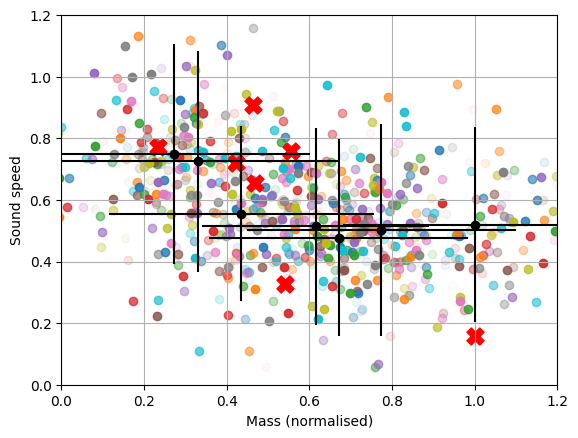

In [9]:
# np.random.randint(1, high=3000, size = 20)
# i00 = 1, N/2
i00 = 100 # pick up input point 
X_test00 = X_test[i00] # define array with input data 
#produce output sample 
sample00 = produce_sample_cs(X_test00, model_def = model, n_samples = 100, check_range=False)
produce_sample_plot(sample00) # plot the results 
plt.xlim(0,1.2)
plt.ylim(0,1.2)
plt.grid()
plt.scatter(y_test[i00][1:8], y_test[i00][8:15], marker = "X", color = 'red', s = 150 )
plt.savefig('cs-mass_i100-n100.png', bbox_inches='tight')


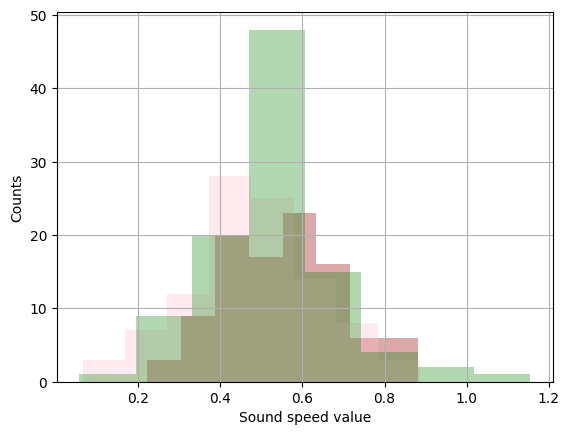

In [17]:
# Histograms  for sound speed
i00 = 100 #This picks up the data points we want
X_test00 = X_test[i00]
bins = 8 # number of bins for histograms
#sample00 = produce_sample_cs(X_test00, model_def = model, n_samples = 100, check_range=False)

data12  = sample00[:,2][:,1]
data22  = sample00[:,4][:,1]
data32  = sample00[:,6][:,1]
plt.hist(data12, bins = bins, color = "brown", alpha = 0.4)
plt.hist(data22, bins = bins,color = "pink", alpha = 0.3)
plt.hist(data32 ,bins = bins,color = "green", alpha = 0.3)
plt.grid()
plt.xlabel("Sound speed value")
plt.ylabel("Counts")
plt.savefig('histo_cs_i100-n100.png', bbox_inches='tight')


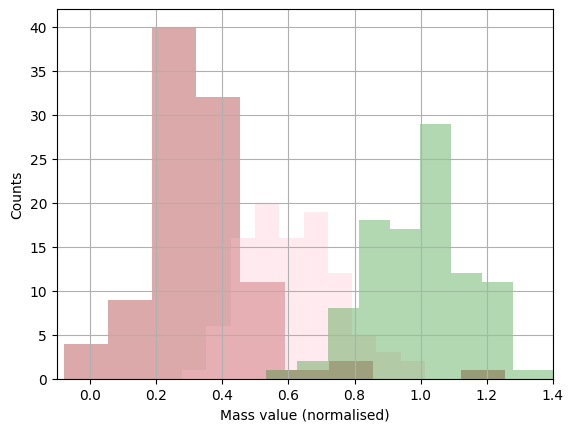

In [18]:
# Histograms for mass
i00 = 100 #This picks up the data points we want
X_test00 = X_test[i00]
bins = 10 # number of bins for histograms

#sample00 = produce_sample_cs(X_test00, model_def = model, n_samples = 100, check_range=False)
data11  = sample00[:,1][:,0]
data21  = sample00[:,3][:,0]
data31  = sample00[:,6][:,0]
plt.hist(data11, bins = bins, color = "brown", alpha = 0.4)
plt.hist(data21, bins = bins,color = "pink", alpha = 0.3)
plt.hist(data31 ,bins = bins,color = "green", alpha = 0.3)
plt.grid()
plt.xlim(-0.1,1.4)
plt.xlabel("Mass value (normalised)")
plt.ylabel("Counts")
plt.savefig('histo_mass_i100-n100.png', bbox_inches='tight')

In [21]:
print('True vacuum value 1 =', np.sort(Lambda_values_test)[12000])
print('True vacuum value 2 =', np.sort(Lambda_values_test)[-1])

True vacuum value 1 = 0.11340206
True vacuum value 2 = 1.0


True vacuum value 1 = 0.11340206
True vacuum value 2 = 1.0


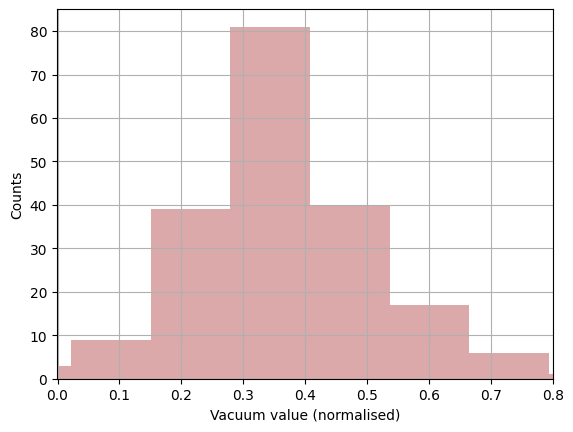

Mean, std Λ-value 1 =  0.35745487  ,  0.18412368
Mean, std Λ-value 2 =  0.34443292  ,  0.17871113


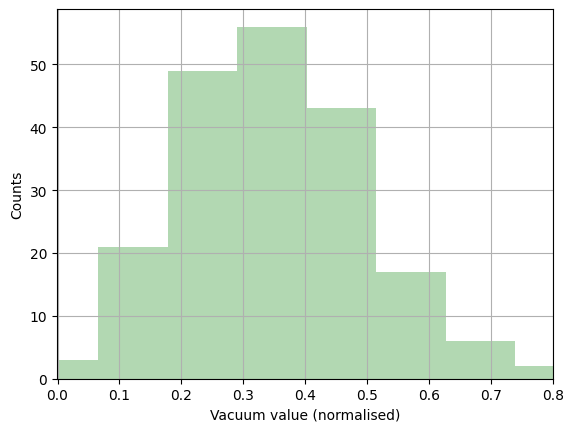

In [25]:
bins = 15 # number of bins for histograms

print('True vacuum value 1 =', np.sort(Lambda_values_test)[12000])
print('True vacuum value 2 =', np.sort(Lambda_values_test)[-1])

X_test001 = X_test[12000]
X_test002 = X_test[-1]
#data1  = produce_sample_Lambda(X_test001, model, n_samples = 200)
#data2  = produce_sample_Lambda(X_test002, model, n_samples = 200)

plt.hist(data1, bins = bins, color = "brown", alpha = 0.4)
plt.grid()
plt.xlim(-0.001, 0.8)
plt.xlabel("Vacuum value (normalised)")
plt.ylabel("Counts")
plt.savefig('histo_Lambda-0-n100.png', bbox_inches='tight')
plt.show()
plt.hist(data2, bins = bins,color = "green", alpha = 0.3)
plt.grid()
plt.xlim(-0.001, 0.8)
plt.xlabel("Vacuum value (normalised)")
plt.ylabel("Counts")
plt.savefig('histo_Lambda-1-n100.png', bbox_inches='tight')

print('Mean, std Λ-value 1 = ', np.mean(data1), ' , ' , np.std(data1))
print('Mean, std Λ-value 2 = ', np.mean(data2), ' , ', np.std(data2))